In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyfaradio.faradio import SpheDetector

vz = 0.9

def get_position(time):
    #z = np.sin(time/500)
    z = np.zeros_like(time)
    y = np.cos(time/30)
    x = time * vz
    return np.array([x, y, z]).T

time = np.arange(0, 1200, 1)
dt = time[1] - time[0]
charge = 1

position = get_position(time)
beta = np.diff(position, axis=0)/dt
position = position[:-1]

time = time[1:-1]
beta_prev = beta[:-1, :]
beta_cur = beta[1:, :]
position_prev = position[:-1, :]
position_cur = position[1:, :]

from numpy import pi

det = SpheDetector([0, 0, -pi/2, 100000.0], 
                [1200, pi/2, pi/2, 100000], 
                [2000, 20, 20, 1])

In [2]:
faradio_mpi = det.get_mpi()

# MPI arange data
for i in range(faradio_mpi.rank(), time.shape[0], faradio_mpi.size()):
#for i in range(time.shape[0]):
    det.cmp_emf(position_cur[i], position_prev[i], beta_cur[i], beta_prev[i], time[i], charge, dt)

det.reduce()

field3d = det.get_emf()
screen = det.get_screen_potisions()
data = np.array(field3d.to_memoryview(), copy = False)

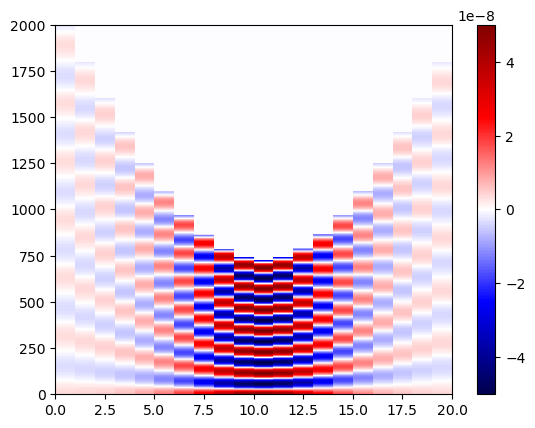

In [3]:
plt.pcolormesh(#np.arange(-pi/2, pi/2, pi/20), np.arange(0, 600, 600/1000), 
               data[:, 10, :], cmap = "seismic")
plt.colorbar()

plt.savefig("test.jpg")

(0.0, 1000.0)

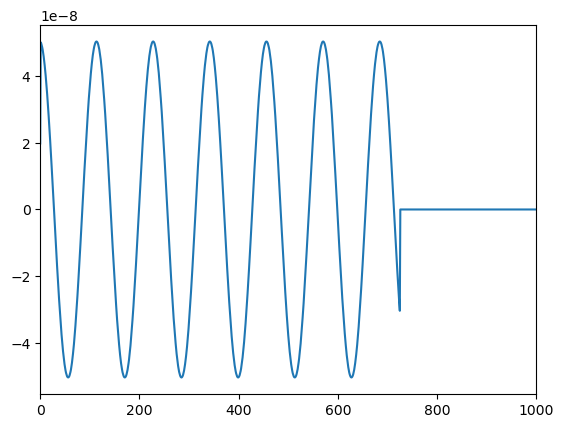

In [4]:
plt.plot(#np.arange(0, 600, 600/1000), 
         data[:, 10, 10])
plt.xlim([0, 1000])

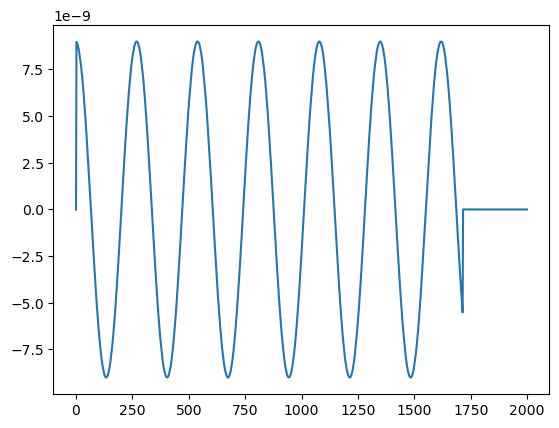

In [5]:
plt.plot(#np.arange(0, 600, 600/1000), 
         data[:, 2, 10])
#plt.xlim([0, 500])